In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# Basis of calcs
Light intensity hitting the solar module can also be approximately calculated by knowing the solar panels exact angle in relation to the sun in clear skies. A solar panel angled exactly perpendicular to the sun would yield cosine(0 degrees) = 1 or 100% sun. 
A solar module angled 30 degrees away from the sun would yield cosine (30 degrees) = 0.866 = ~ 87% sun

# Sun path and track simulation

I need a simple model to work with, so 

In [50]:
data={}
# Going to Aproximate the sun for 8 hours in the day
for min in range(0,8*60):
    alt=90*math.sin(math.pi/(8*60)*min)
    bearing=90-90*math.sin(math.pi/(8*60)*min)
    data[min]={'idx':min,'alt':alt,'bearing':bearing}

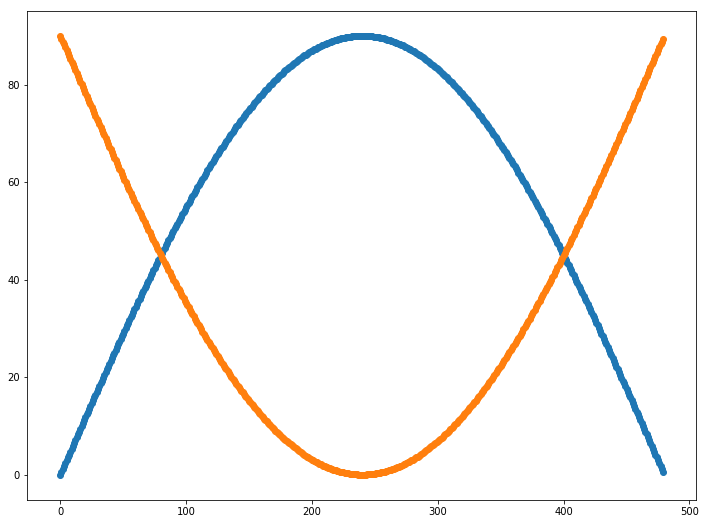

In [56]:
df=pd.DataFrame.from_dict(data=data,orient='index')
fig_size=[12,9]
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(df.idx,df.alt)
plt.scatter(df.idx,df.bearing)
plt.show()

# Sun power

I will approximate the suns power to being the same as the Altitude of the sun. 

And a maximum it will be 100 units per minute. 

In [87]:
data={}
# Going to Aproximate the sun for 8 hours in the day
for min in range(0,8*60):
    alt=90*math.sin(math.pi/(8*60)*min)
    bearing=(90*math.cos(math.pi/(8*60)*min))%360
    power=100*math.sin(math.pi/(8*60)*min)
    data[min]={'idx':min,'alt':alt,'bearing':bearing,'pwr':power}

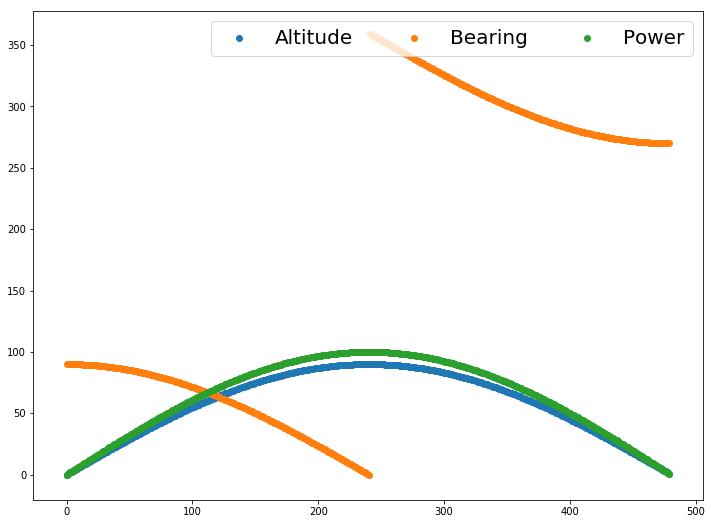

In [88]:
df=pd.DataFrame.from_dict(data=data,orient='index')
fig_size=[12,9]
plt.rcParams["figure.figsize"] = fig_size
g1=plt.scatter(df.idx,df.alt)
g2=plt.scatter(df.idx,df.bearing)
g3=plt.scatter(df.idx,df.pwr)
plt.legend((g1,g2,g3),
           ('Altitude', 'Bearing', 'Power',),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=20)
plt.show()

# Tracked or Non-Tracked

The previous graph assumes that there is a perfect tracking system, so the solar panels get maximum sun at all times during the day.

The total Power is calculated by simply adding up the power column

In [76]:
print("Total Power in a day in a perfect tracking system is {} Units".format(df.pwr.sum()))

Total Power in a day in a perfect tracking system is 30557.639990487776 Units


# Fixed Comparison

We will try off an an inclination of 30% 